# Working with natural language tools to explore eBook texts

Initial work based on project found here: https://danieljohndavis.github.io/word-frequency.html

In [18]:
import requests
import nltk
from bs4 import BeautifulSoup

# Prompt for eBook link
# The Count of Monte Cristo link is 'https://www.gutenberg.org/files/1184/1184-h/1184-h.htm'
try:
    r = requests.get(input('Paste HTM link from Project Gutenberg (uses TCOMC if left blank):'))
except:
    r = requests.get('https://www.gutenberg.org/files/1184/1184-h/1184-h.htm')

# set encoding
r.encoding = 'utf-8'

# extract html
html = r.text

# test with a print
print(html[0:100])

Paste HTM link from Project Gutenberg (uses TCOMC if left blank):
﻿<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//


In [16]:
# getting soupy
soup = BeautifulSoup(html, 'html.parser')

# gimme that text
text = soup.get_text()

# test print of text
print(text[20000:20100])


    

      “No. I gave the custom-house officers a copy of our bill of lading;
      and as to 


In [17]:
# tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# tokenize text
tokens = tokenizer.tokenize(text)

# print some tokens
print(tokens[:11])

['The', 'Count', 'of', 'Monte', 'Cristo', 'by', 'Alexandre', 'Dumas', 'père', 'body', 'margin']


In [4]:
# force lower on all words so capitalization isn't treated as unique
words = []

for word in tokens:
    words.append(word.lower())

print(words[0:11])


['the', 'project', 'gutenberg', 'e', 'text', 'of', 'the', 'picture', 'of', 'dorian', 'gray']


In [5]:
#nltk.download() -- didn't need to do this, turns out. upgraded anaconda

# remove stop words using built-in functionality of nltk. came back and added 'said'
sw = nltk.corpus.stopwords.words('english')
addl_sw = ['said']
sw.extend(addl_sw)

print(sw[0:11])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]


In [6]:
# get list of words without stop words or use words

use_words = [word for word in words if word not in sw]

print(use_words[:11])

['project', 'gutenberg', 'e', 'text', 'picture', 'dorian', 'gray', 'oscar', 'wilde', 'body', 'color']


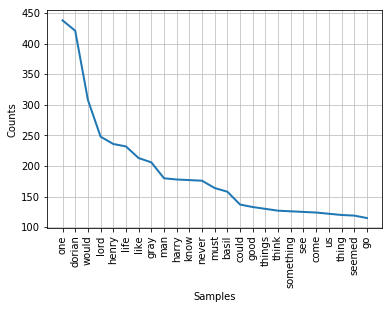

In [7]:
# sweet pretty sure we're good to go. let's check out distribution

%matplotlib inline

freqdist = nltk.FreqDist(use_words)

freqdist.plot(25)

In [8]:
# what else would be interesting to look at? show freqdist by word with count

for word, frequency in freqdist.most_common(15):
    print(u'{};{}'.format(word, frequency))

one;438
dorian;421
would;308
lord;248
henry;236
life;232
like;213
gray;206
man;180
harry;178
know;177
never;176
must;164
basil;158
could;137


In [9]:
# Some other basics...

# Number of words
print(len(words))

83767


In [10]:
# Number of 'use' words (filters out stop words)
print(len(use_words))

38988


In [11]:
# How long would it take to read TCOMC with an average reading speed?

# Minutes to read assuming 250 WPM reading speed
mins_to_read = (len(words)/250)
print(mins_to_read)

# Converting to days, hours
hours_to_read = mins_to_read/60
print(hours_to_read)

335.068
5.584466666666667
